In [1]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRC4x6mecC7EkofiP3uJWZ3Y1jD1B2QMZXjlFtdP9-TOan6Fms2TqyOyssHegjTeG7iM6f-qX89vfvK/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Biomass']=df['Biomass'].dropna()

In [6]:
# Fit the Auto ARIMA model
auto_arima_model = pm.auto_arima(df['Biomass'], seasonal=True, m=12,
                                 trace=True, error_action='ignore',
                                 suppress_warnings=True)

print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=821.472, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=825.204, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=821.591, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=822.257, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=823.214, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=4.13 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(

In [7]:
# In-sample predictions
in_sample_preds = auto_arima_model.predict_in_sample()

# Calculate error metrics
mse = mean_squared_error(df['Biomass'], in_sample_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['Biomass'], in_sample_preds)
r2 = r2_score(df['Biomass'], in_sample_preds)

print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")


MSE: 2444.0011702768497, RMSE: 49.43684021331511, MAE: 27.78561427470626, R-squared: 0.05148850813171324


In [18]:
# Forecast future values
future_periods = 30
forecast = auto_arima_model.predict(n_periods=future_periods)
future_dates = pd.date_range(start=df.index[-1], periods=future_periods + 1, freq='M')[1:]


In [19]:
forecast

2023-01-01    301.717209
2023-02-01    292.512614
2023-03-01    294.423832
2023-04-01    275.611448
2023-05-01    277.232227
2023-06-01    274.191206
2023-07-01    255.933675
2023-08-01    243.876858
2023-09-01    236.546744
2023-10-01    245.855874
2023-11-01    241.641968
2023-12-01    273.584151
2024-01-01    275.530048
2024-02-01    268.539806
2024-03-01    277.946739
2024-04-01    261.148200
2024-05-01    265.087980
2024-06-01    262.839743
2024-07-01    245.860543
2024-08-01    234.430060
2024-09-01    227.549558
2024-10-01    236.692599
2024-11-01    232.666006
2024-12-01    263.724643
2025-01-01    265.623262
2025-02-01    258.824121
2025-03-01    267.951155
2025-04-01    251.610721
2025-05-01    255.418143
2025-06-01    253.211243
Freq: MS, dtype: float64

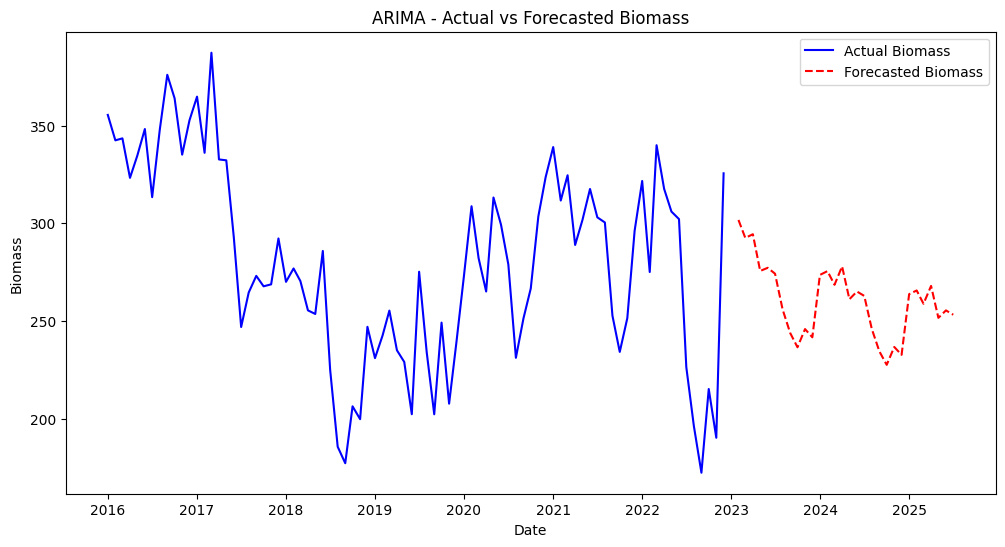

In [17]:
# Plotting the original and forecasted values
plt.figure(figsize=(12, 6))

# Plot actual values from the dataset
plt.plot(df.index, df['Biomass'], label='Actual Biomass', color='blue')

# Plot forecasted values from the ARIMA model
plt.plot(future_dates, forecast, label='Forecasted Biomass', color='red', linestyle='dashed')

plt.title('ARIMA - Actual vs Forecasted Biomass')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.legend()
plt.show()
